# IELTS Training Analysis


This notebook analyzes my training process on IELTS over time, including:
- Score trends
- Band score distribution
- Time management analysis
- Recent performance comparison

P.S.
    I use [趴趴模考中心一站式备考服务](https://ielts.papaen.com/ielts/index) to practice IELTS.

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import numpy as np
from datetime import datetime


# Configure matplotlib settings
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

# Load and process data
def load_test_data(section, data):
    """Load test data for a specific section (Listening/Reading)"""
    return pd.DataFrame([{
        'test': test,
        'date': datetime.strptime(details['date'], '%Y-%m-%d %H:%M:%S'),
        'score': details['score'],
        'band': details['band'],
        'time': details['time']
    } for test, details in data[section].items()])

# Read YAML file
with open('train_log.yml', 'r') as file:
    data = yaml.safe_load(file)

# Create and sort DataFrames
listening_df = load_test_data('Listening', data).sort_values('date', ascending=False)
reading_df = load_test_data('Reading', data).sort_values('date', ascending=False)

# Add test numbers (most recent = 1)
listening_df['test_number'] = range(1, len(listening_df) + 1)
reading_df['test_number'] = range(1, len(reading_df) + 1)


## Overall Performance Analysis

The following plots show:
1. Score trends over time
2. Band score distribution
3. Time management trends for both sections

/var/folders/bg/snc3b8lx44b5smmrcsxf6mz80000gn/T/ipykernel_12970/2118555245.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([listening_df['band'], reading_df['band']],


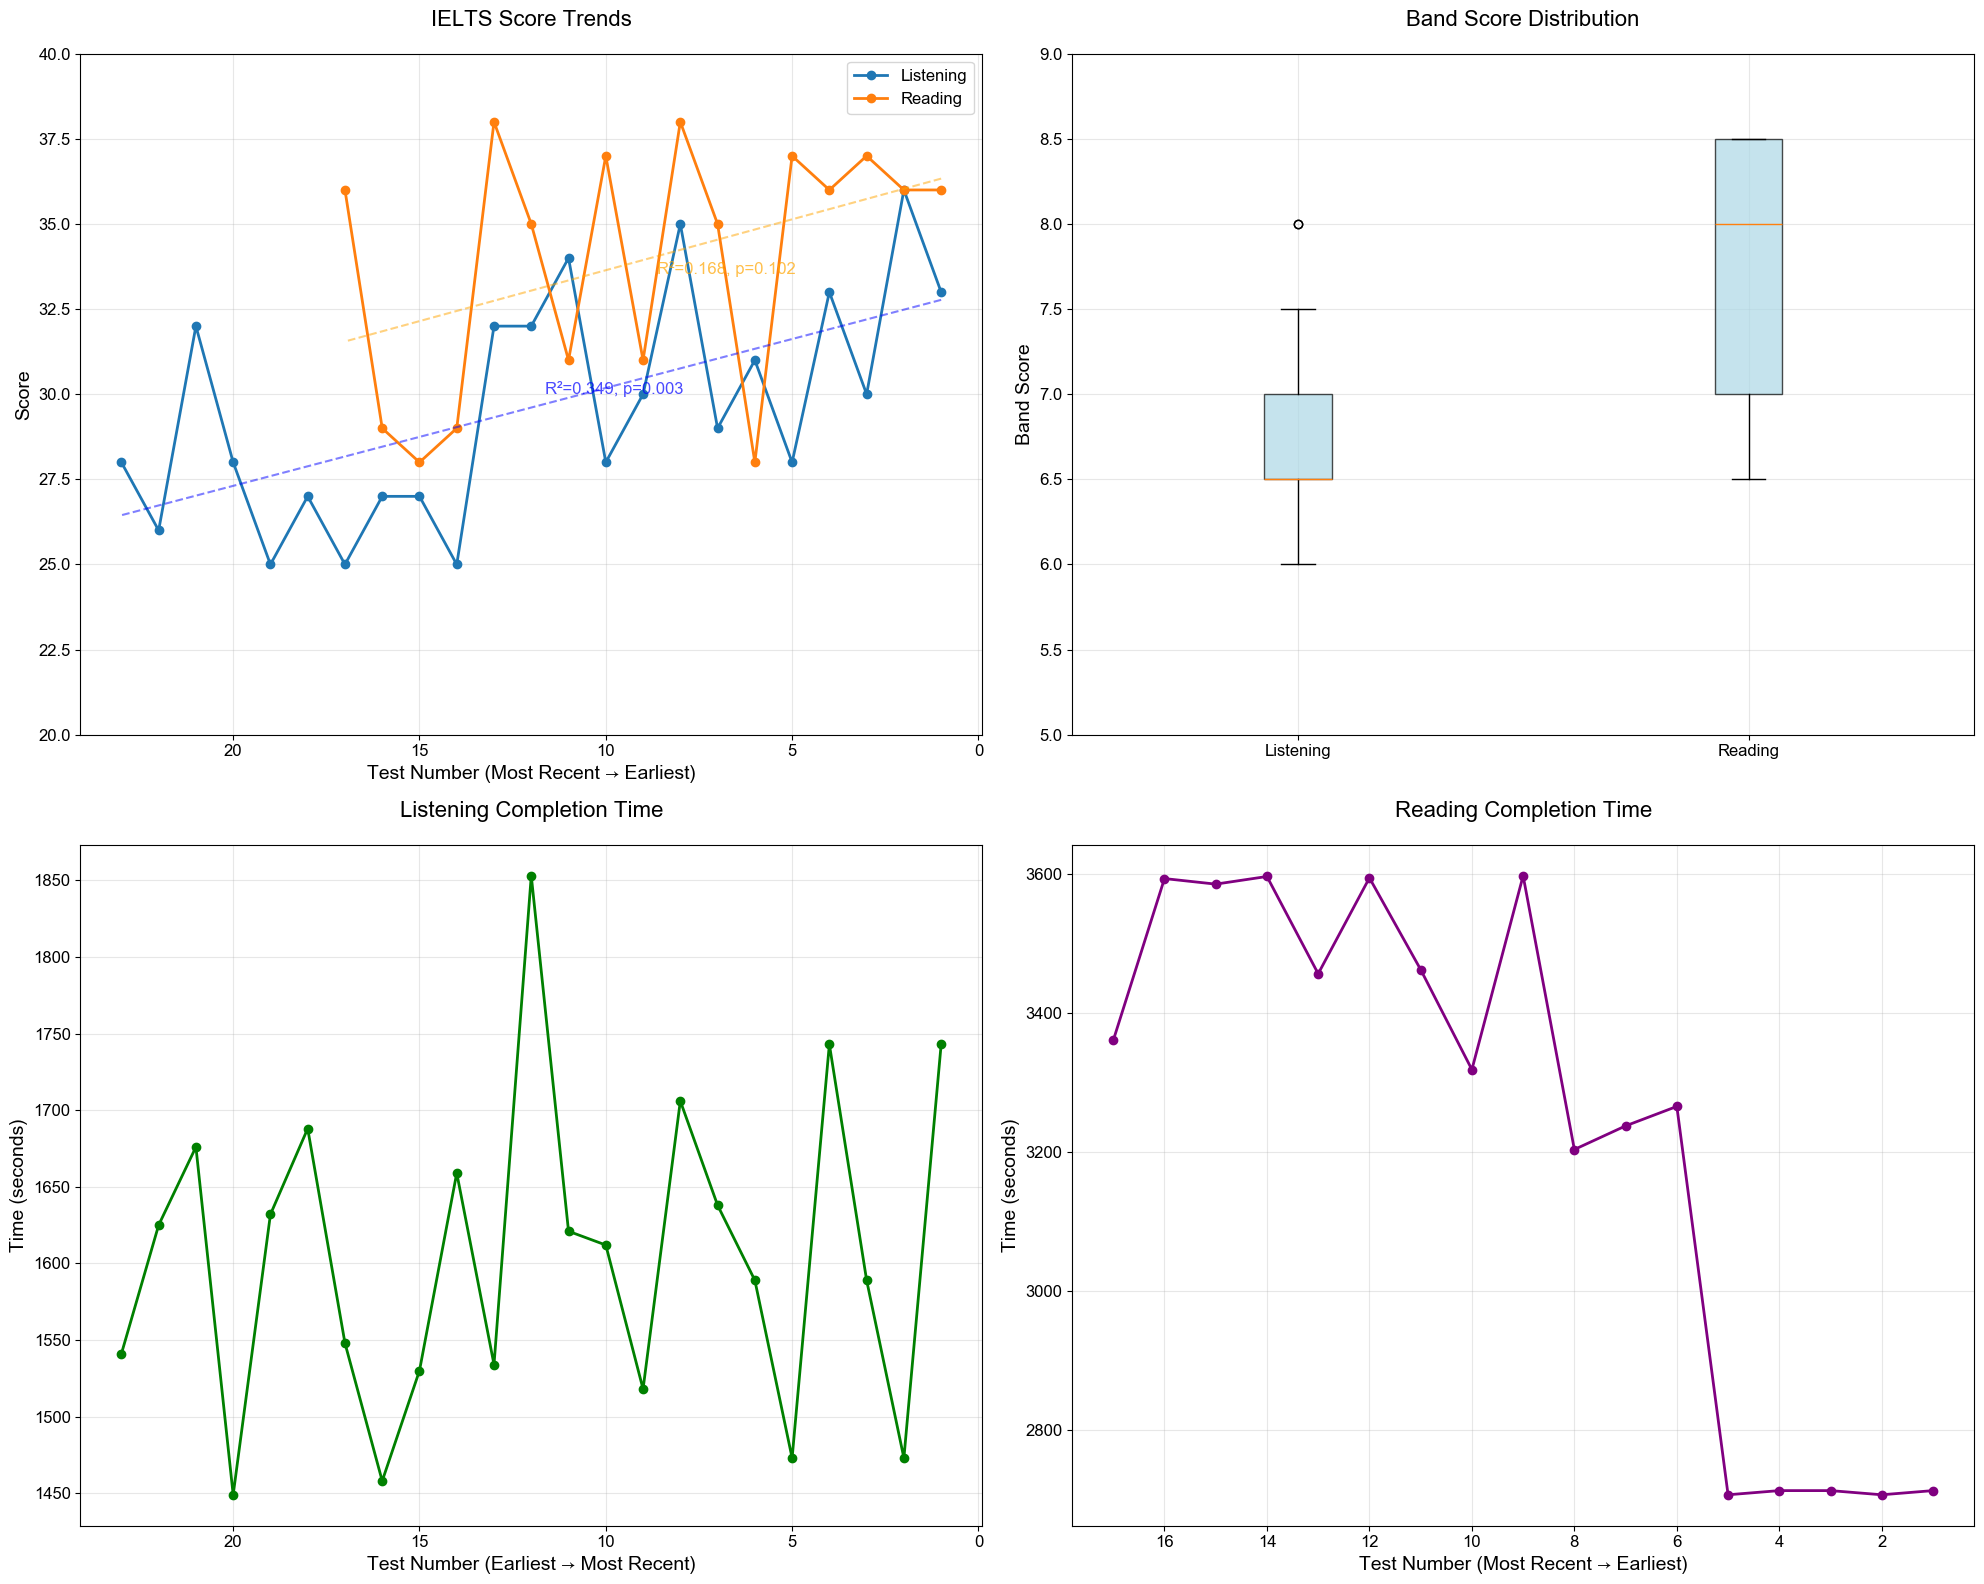

In [86]:
from scipy import stats
# Create main analysis plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Score trends
ax = axes[0, 0]
ax.plot(listening_df['test_number'], listening_df['score'], marker='o', label='Listening', linewidth=2)
ax.plot(reading_df['test_number'], reading_df['score'], marker='o', label='Reading', linewidth=2)

# Add trend lines and calculate R² and p-value
z1 = np.polyfit(listening_df['test_number'], listening_df['score'], 1)
p1_func = np.poly1d(z1)
r1 = np.corrcoef(listening_df['test_number'], listening_df['score'])[0,1]
r2_1 = r1**2
_, pval1 = stats.pearsonr(listening_df['test_number'], listening_df['score'])
line1 = ax.plot(listening_df['test_number'], p1_func(listening_df['test_number']), 
        '--', color='blue', alpha=0.5)
ax.annotate(f'R²={r2_1:.3f}, p={pval1:.3f}',
           xy=(listening_df['test_number'].mean(), p1_func(listening_df['test_number'].mean())),
           xytext=(10, 10), textcoords='offset points',
           color='blue', alpha=0.7)

z2 = np.polyfit(reading_df['test_number'], reading_df['score'], 1)
p2_func = np.poly1d(z2)
r2 = np.corrcoef(reading_df['test_number'], reading_df['score'])[0,1]
r2_2 = r2**2
_, pval2 = stats.pearsonr(reading_df['test_number'], reading_df['score'])
line2 = ax.plot(reading_df['test_number'], p2_func(reading_df['test_number']), 
        '--', color='orange', alpha=0.5)
ax.annotate(f'R²={r2_2:.3f}, p={pval2:.3f}',
           xy=(reading_df['test_number'].mean(), p2_func(reading_df['test_number'].mean())),
           xytext=(10, -10), textcoords='offset points', 
           color='orange', alpha=0.7)

ax.set_title('IELTS Score Trends', fontsize=16, pad=20)
ax.set_xlabel('Test Number (Most Recent → Earliest)', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim([20, 40])
ax.invert_xaxis()

# 2. Band score distribution
ax = axes[0, 1]
bp = ax.boxplot([listening_df['band'], reading_df['band']], 
                labels=['Listening', 'Reading'], 
                patch_artist=True)
for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.7)
ax.set_title('Band Score Distribution', fontsize=16, pad=20)
ax.set_ylabel('Band Score', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_ylim([5, 9])

# 3. Listening completion time
ax = axes[1, 0]
ax.plot(listening_df['test_number'], listening_df['time'], marker='o', color='green', linewidth=2)
ax.set_title('Listening Completion Time', fontsize=16, pad=20)
ax.set_xlabel('Test Number (Earliest → Most Recent)', fontsize=14)
ax.set_ylabel('Time (seconds)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.invert_xaxis()

# 4. Reading completion time
ax = axes[1, 1]
ax.plot(reading_df['test_number'], reading_df['time'], marker='o', color='purple', linewidth=2)
ax.set_title('Reading Completion Time', fontsize=16, pad=20)
ax.set_xlabel('Test Number (Most Recent → Earliest)', fontsize=14)
ax.set_ylabel('Time (seconds)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.invert_xaxis()

plt.tight_layout()
plt.show()


根据训练数据，和拟合结果，通过p值，可以发现，训练次数可以解释 （$R^2$） 听力分数的 95%， 阅读分数的 90%。

p值可以说明训练次数对于听力分数的影响显著，但是不能说明训练次数对于阅读分数的影响显著。

## Training Frequency Statistics

show the training frequency of my training on IELTS 

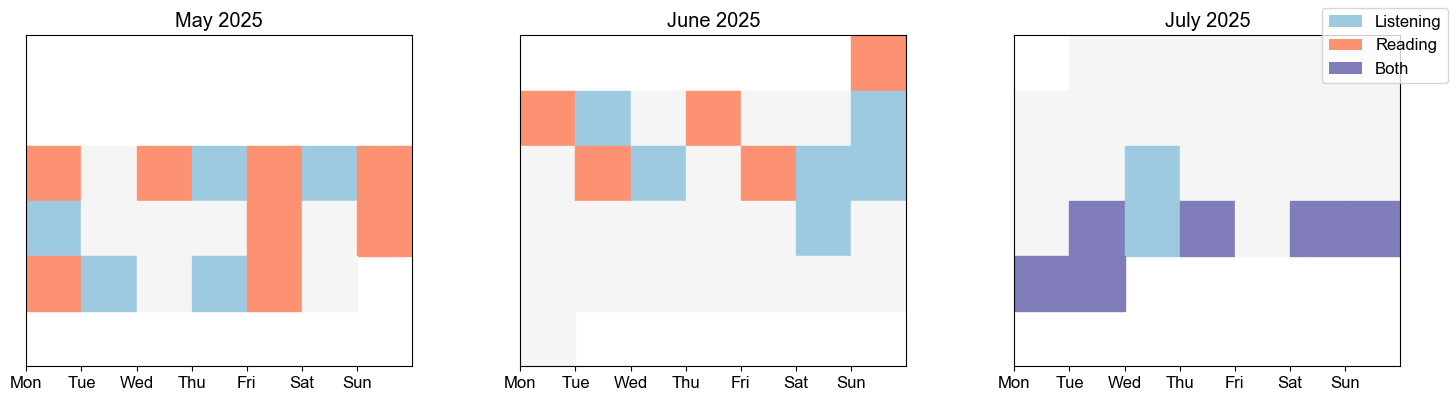

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import calendar

# 创建训练数据（与你已有代码一样）
listening_dates = pd.to_datetime(listening_df['date']).dt.normalize()
reading_dates = pd.to_datetime(reading_df['date']).dt.normalize()

start_date = min(listening_dates.min(), reading_dates.min())
end_date = max(listening_dates.max(), reading_dates.max())
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

training_data = pd.Series(0, index=date_range)
for date in listening_dates:
    training_data[date] += 1
for date in reading_dates:
    training_data[date] += 2

# 颜色设置
colors = {
    0: '#f5f5f5',
    1: '#9ecae1',
    2: '#fc9272',
    3: '#807dba'
}
cmap = ListedColormap([colors[i] for i in range(4)])

# 提取非零月份
nonzero_months = training_data[training_data > 0].index.to_period('M').unique()

# 按月绘图
n_cols = 3
n_rows = -(-len(nonzero_months) // n_cols)  # 向上取整
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, period in enumerate(nonzero_months):
    ax = axes[i]
    month_data = training_data[training_data.index.to_period('M') == period]

    # 生成月日历矩阵
    month_dates = month_data.index
    days = month_dates.day
    weekdays = month_dates.weekday
    week_of_month = ((days - 1 + month_dates[0].weekday()) // 7)

    # 画每个格子
    for date, value in month_data.items():
        x = date.weekday()  # 0=Mon
        y = ((date.day + date.replace(day=1).weekday() - 1) // 7)
        ax.add_patch(plt.Rectangle((x, y), 1, 1, color=colors[value]))

    # 样式
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 6)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set_yticks([])
    ax.set_title(f'{period.strftime("%B %Y")}')
    ax.set_aspect('equal')
    ax.invert_yaxis()

# 移除多余子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 添加图例
legend_elements = [
    Patch(facecolor=colors[1], label='Listening'),
    Patch(facecolor=colors[2], label='Reading'),
    Patch(facecolor=colors[3], label='Both')
]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


## Recent Performance Analysis

Detailed comparison of the most recent 7 tests, showing:
- Direct score comparison between Listening and Reading
- Band scores for each test
- Clear visualization of recent trends



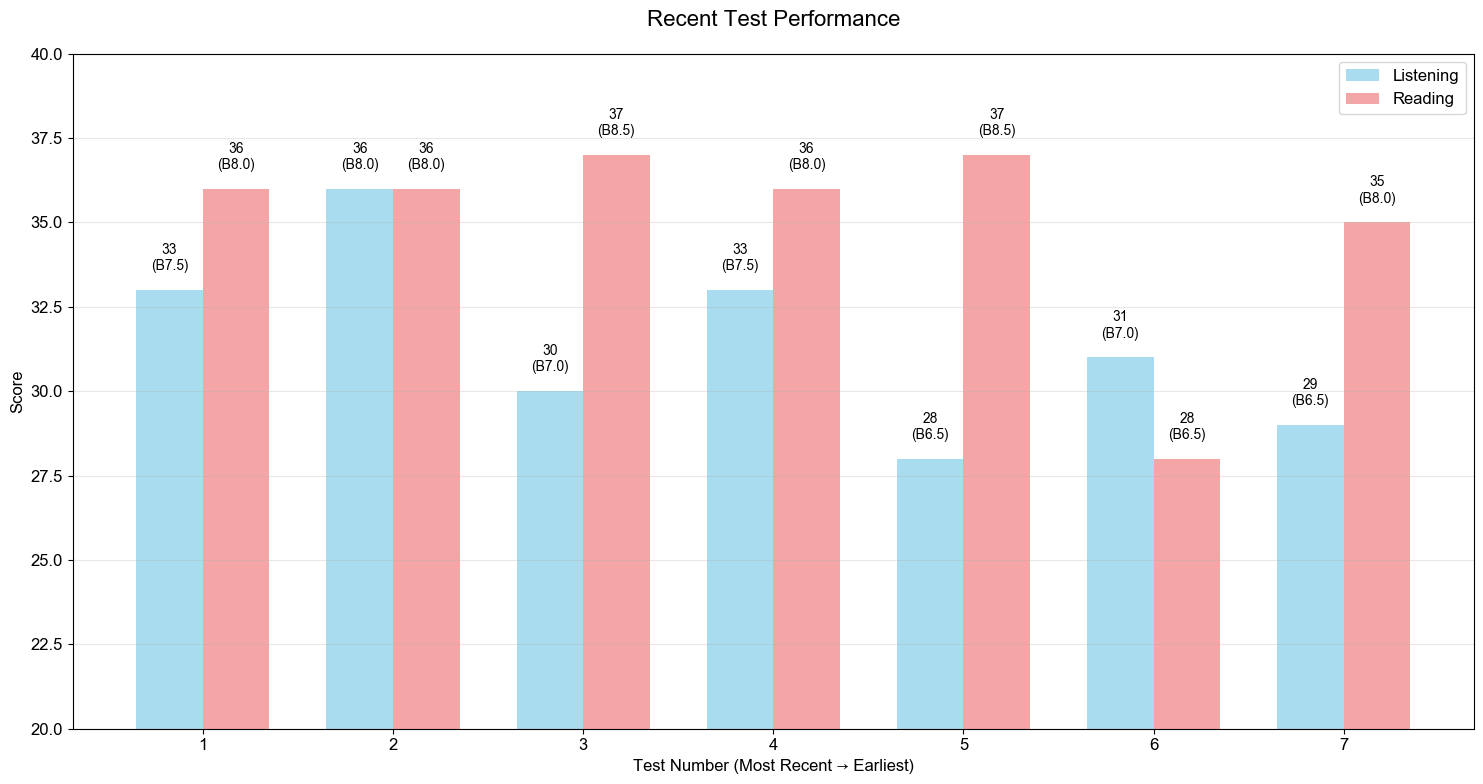

In [79]:
# Create recent performance comparison
plt.figure(figsize=(15, 8))

# Get recent test data
recent_listening = listening_df.head(7)
recent_reading = reading_df.head(7)

# Set up bar positions
x = np.arange(7)
width = 0.35

# Create bars
plt.bar(x - width/2, recent_listening['score'], width, label='Listening', color='skyblue', alpha=0.7)
plt.bar(x + width/2, recent_reading['score'], width, label='Reading', color='lightcoral', alpha=0.7)

# Add score labels with band scores
for i, (score, band) in enumerate(zip(recent_listening['score'], recent_listening['band'])):
    plt.text(i - width/2, score + 0.5, f'{score}\n(B{band})', ha='center', va='bottom', fontsize=10)
for i, (score, band) in enumerate(zip(recent_reading['score'], recent_reading['band'])):
    plt.text(i + width/2, score + 0.5, f'{score}\n(B{band})', ha='center', va='bottom', fontsize=10)

# Configure plot
plt.title('Recent Test Performance', fontsize=16, pad=20)
plt.xlabel('Test Number (Most Recent → Earliest)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(fontsize=12)
plt.xticks(x, range(1, 8))
plt.ylim(20, 40)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Statistical Summary

Key statistics for both Listening and Reading sections:



In [80]:
# Calculate and display statistics
def print_section_stats(df, section):
    """Print statistics for a test section"""
    print(f"{section} Statistics:")
    print("-" * 50)
    print(f"Average Score: {df['score'].mean():.2f}")
    print(f"Average Band: {df['band'].mean():.2f}")
    print(f"Highest Score: {df['score'].max()} (Band {df.loc[df['score'].idxmax(), 'band']})")
    print(f"Lowest Score: {df['score'].min()} (Band {df.loc[df['score'].idxmin(), 'band']})")
    print(f"Average Completion Time: {df['time'].mean():.2f} seconds\n")

print_section_stats(listening_df, "Listening")
print_section_stats(reading_df, "Reading")


Listening Statistics:
--------------------------------------------------
Average Score: 29.61
Average Band: 6.80
Highest Score: 36 (Band 8.0)
Lowest Score: 25 (Band 6.0)
Average Completion Time: 1604.26 seconds

Reading Statistics:
--------------------------------------------------
Average Score: 33.94
Average Band: 7.68
Highest Score: 38 (Band 8.5)
Lowest Score: 28 (Band 6.5)
Average Completion Time: 3225.35 seconds

